# Makine Öğrenimi ile Fiyat Konut Tahmini EDA - Keşifsel Data Analizi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_excel(r"C:\Users\Monster\Desktop\konut-fiyat-tahmin-projesi\Veri Seti\istanbul_konut2.xlsx")

In [3]:
# Eksik değerlerin toplamını ve oranını göster
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Eksik değer tablosu oluştur
missing_data = pd.DataFrame({'Eksik Değerler': missing_values, 'Eksik Oranı (%)': missing_percent})
print(missing_data)

               Eksik Değerler  Eksik Oranı (%)
Fiyat                       0         0.000000
İlce                        0         0.000000
Mahalle                     0         0.000000
Metre Kare                  0         0.000000
Oda Sayısı                  2         0.006988
Yaş                        24         0.083852
Bulunduğu Kat             936         3.270212


In [4]:
# 'Yaş' sütunundaki eksik değerleri medyan ile doldur
df['Yaş'] = df['Yaş'].fillna(df['Yaş'].median())
# 'Bulunduğu Kat' sütunundaki eksik değerleri mod ile doldur
df['Bulunduğu Kat'] = df['Bulunduğu Kat'].fillna(df['Bulunduğu Kat'].mode()[0])
# Oda Sayısı sütunundaki eksik değerleri mod (en sık görülen değer) ile doldur
most_frequent_value = df['Oda Sayısı'].mode()[0]
df['Oda Sayısı'] = df['Oda Sayısı'].fillna(most_frequent_value)
print(df.isnull().sum())

Fiyat            0
İlce             0
Mahalle          0
Metre Kare       0
Oda Sayısı       0
Yaş              0
Bulunduğu Kat    0
dtype: int64


In [6]:
df

,Fiyat,İlce,Mahalle,Metre Kare,Oda Sayısı,Yaş,Bulunduğu Kat
0,5000000,Adalar,Burgazada Mah,55,2.0,24.0,0.0
1,7500000,Adalar,Nizam Mah,65,2.0,31.0,0.0
2,4750000,Adalar,Nizam Mah,60,2.0,34.0,0.0
3,7000000,Adalar,MadeMah,75,2.0,35.0,0.0
4,4200000,Adalar,Nizam Mah,51,2.0,38.0,0.0
...,...,...,...,...,...,...,...
28617,4150000,Zeytinburnu,VeliefendMah.,150,6.0,29.0,1.0
28618,4500000,Zeytinburnu,VeliefendMah.,170,6.0,30.0,1.0
28619,17000000,Zeytinburnu,Gökalp Mah.,350,12.0,16.0,0.0
28620,19000000,Zeytinburnu,Beştelsiz Mah.,500,12.0,28.0,0.0


Veri Setinin Temel Bilgileri:
------------------------------
Toplam kayıt sayısı: 28622
Toplam sütun sayısı: 7

Sütun Türleri:
Fiyat              int64
İlce              object
Mahalle           object
Metre Kare         int64
Oda Sayısı       float64
Yaş              float64
Bulunduğu Kat    float64
dtype: object


Sayısal Sütunların Özet İstatistikleri:
----------------------------------------
              Fiyat    Metre Kare    Oda Sayısı           Yaş  Bulunduğu Kat
count  2.862200e+04  28622.000000  28622.000000  28622.000000   28622.000000
mean   6.150015e+06    120.517155      3.547935     14.792817       3.070016
std    4.625959e+06     55.072124      1.349637     14.770576       3.553854
min    1.000000e+06      2.000000      1.000000      0.000000      -3.000000
25%    2.775000e+06     85.000000      3.000000      3.000000       0.000000
50%    4.449000e+06    110.000000      3.000000     10.000000       2.000000
75%    8.500000e+06    140.000000      4.000000     26.000000 

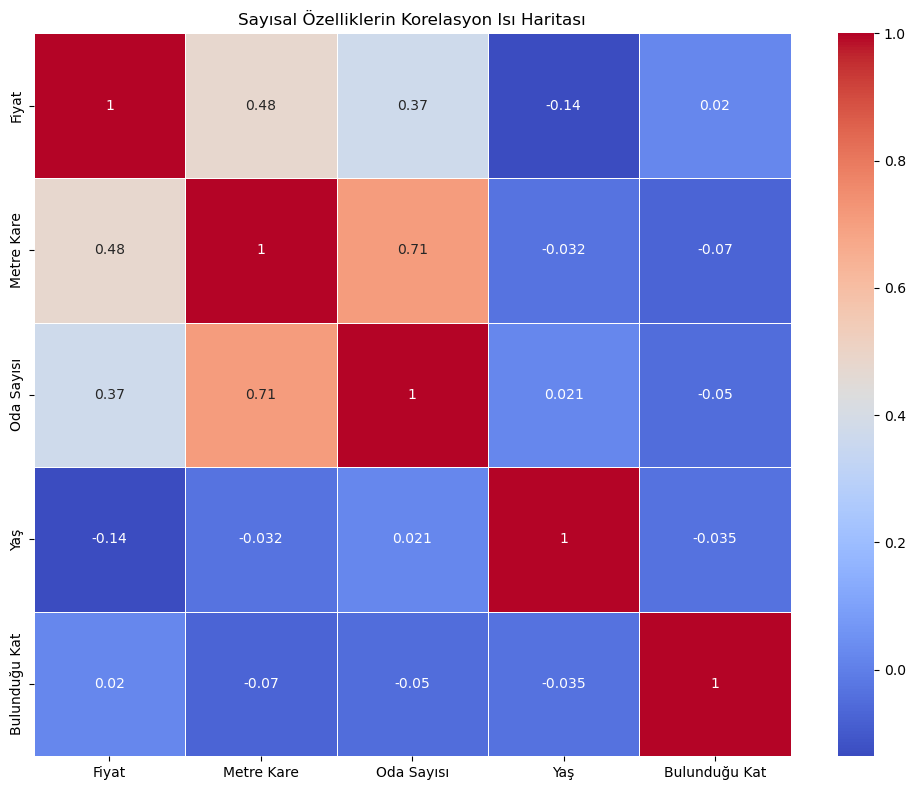

<Figure size 1500x600 with 0 Axes>

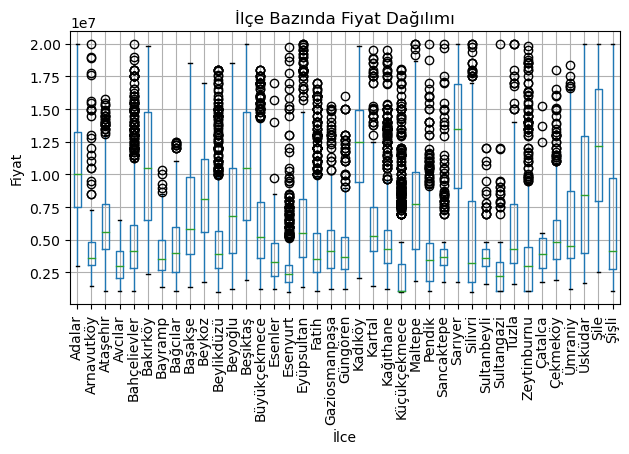

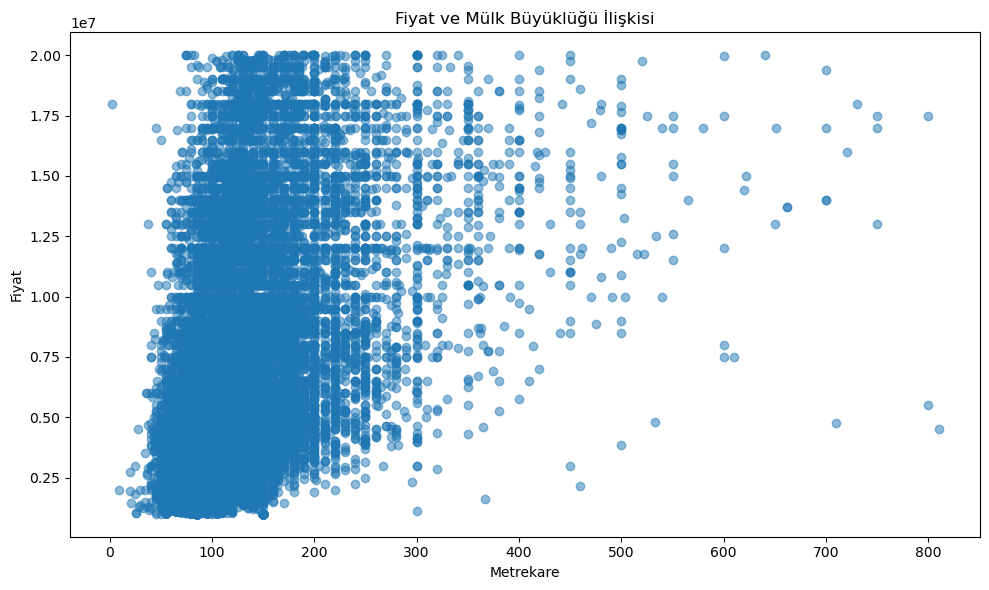

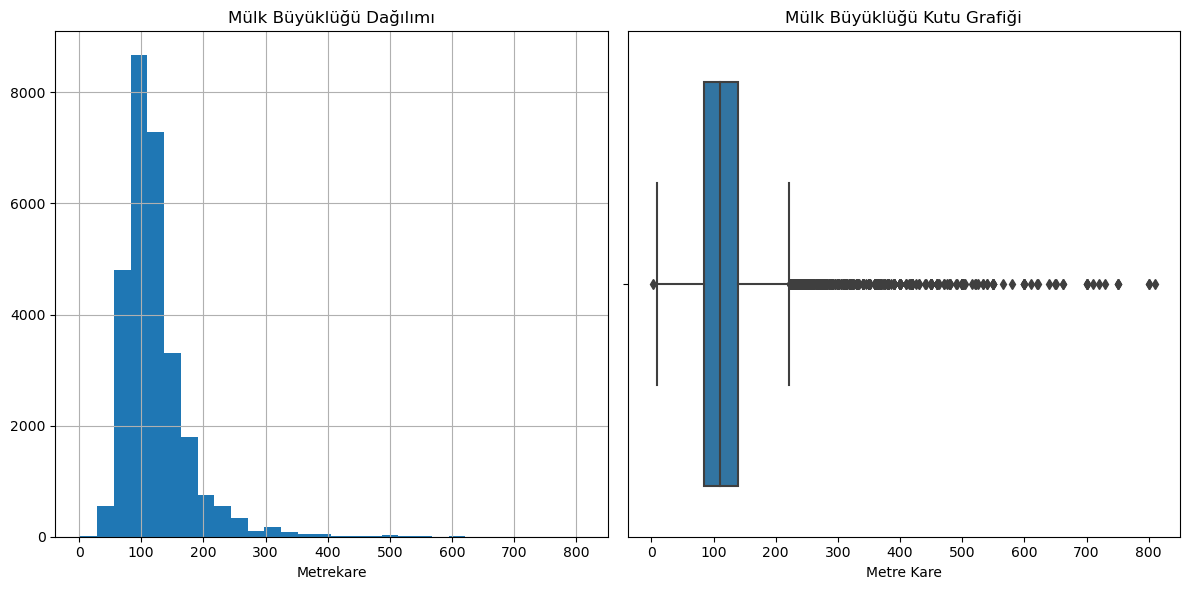

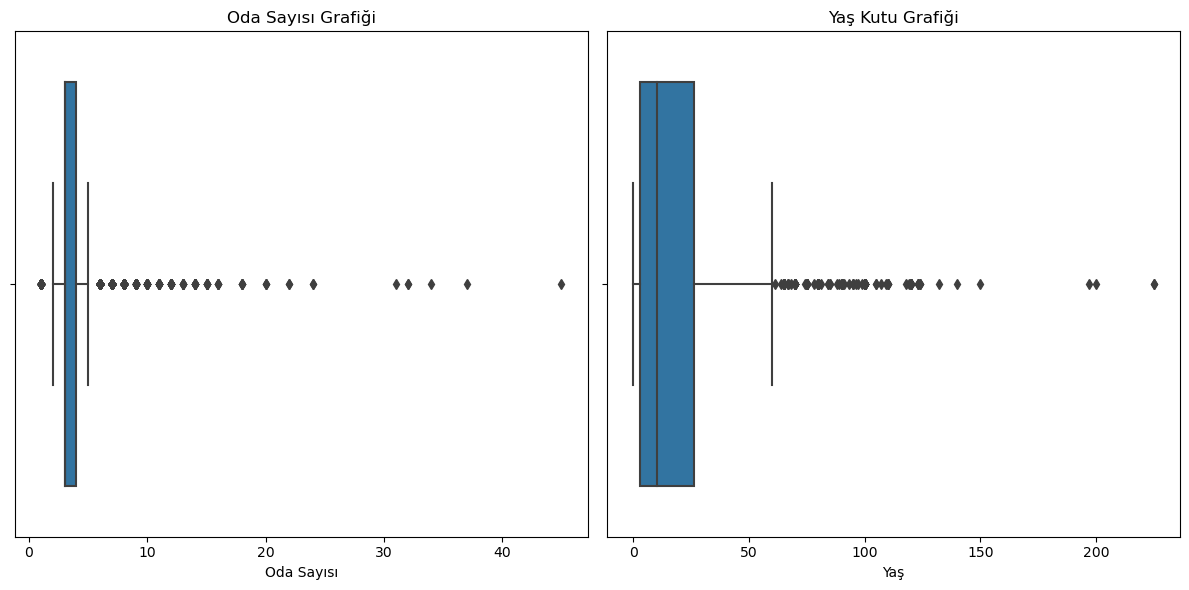

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame yüklü olduğunu varsayıyoruz: 'df'
def veri_kesif_analizi(df):
    # Temel Bilgiler
    print("Veri Setinin Temel Bilgileri:")
    print("-" * 30)
    print(f"Toplam kayıt sayısı: {len(df)}")
    print(f"Toplam sütun sayısı: {len(df.columns)}")
    print("\nSütun Türleri:")
    print(df.dtypes)
    
    # Özet İstatistikler
    print("\n\nSayısal Sütunların Özet İstatistikleri:")
    print("-" * 40)
    sayisal_sutunlar = ['Fiyat', 'Metre Kare', 'Oda Sayısı', 'Yaş', 'Bulunduğu Kat']
    print(df[sayisal_sutunlar].describe())
    
    # Korelasyon Analizi
    plt.figure(figsize=(10, 8))
    korelasyon_matrisi = df[sayisal_sutunlar].corr()
    sns.heatmap(korelasyon_matrisi, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Sayısal Özelliklerin Korelasyon Isı Haritası')
    plt.tight_layout()
    plt.show()
    
    # İlçe Bazında Fiyat Dağılımı
    plt.figure(figsize=(15, 6))
    df.boxplot(column='Fiyat', by='İlce', rot=90)
    plt.title('İlçe Bazında Fiyat Dağılımı')
    plt.suptitle('')  # Otomatik başlığı kaldırır
    plt.ylabel('Fiyat')
    plt.tight_layout()
    plt.show()
    
        # Fiyat ve Metrekare İlişkisi
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Metre Kare'], df['Fiyat'], alpha=0.5)
    plt.title('Fiyat ve Mülk Büyüklüğü İlişkisi')
    plt.xlabel('Metrekare')
    plt.ylabel('Fiyat')
    plt.tight_layout()
    plt.show()
    
    # Mülk Büyüklüğü Dağılımı
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    df['Metre Kare'].hist(bins=30)
    plt.title('Mülk Büyüklüğü Dağılımı')
    plt.xlabel('Metrekare')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df['Metre Kare'])
    plt.title('Mülk Büyüklüğü Kutu Grafiği')
    plt.tight_layout()
    plt.show() 

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=df['Oda Sayısı'])
    plt.title('Oda Sayısı Grafiği')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df['Yaş'])
    plt.title('Yaş Kutu Grafiği')
    plt.tight_layout()
    plt.show()
# Fonksiyonu Çağır
veri_kesif_analizi(df)